IMPORT DEPENDENCIES



ABOUT THE MODULES
TensorFlow (tf):  TensorFlow is used for building and deploying machine learning and deep learning models.
tf.random: TensorFlow provides a module called random for generating random numbers, which are essential when initializing weights in neural networks or when shuffling data.
set_seed(3): This sets a random seed to make the randomness predictable and reproducible. By setting the seed, whenever you generate random values, you will get the same values each time you run the code. This is important in machine learning for ensuring reproducibility, especially when training neural networks.

keras: Keras is a high-level API built on top of TensorFlow, designed to make it easy to build and train deep learning models. It allows for quick and easy prototyping, as well as more flexible and advanced model configurations.
Key Concepts in Keras:

Sequential Model: The simplest Keras model where layers are stacked one after the other.
Functional API: For creating more complex models where layers can connect in different ways, not just sequentially.
Layers: Keras provides many types of layers, such as Dense (fully connected layer-current layer is connected to previous layer), Conv2D (for convolutional neural networks), LSTM (for recurrent neural networks), and more.


tensorflow.math: This is a module in TensorFlow that provides mathematical functions and operations. It’s useful for performing various mathematical computations on tensors, such as matrix multiplication, element-wise operations, etc.

confusion_matrix: This is a function that computes the confusion matrix, a tool commonly used in classification tasks. The confusion matrix helps you understand how well your classification model is performing by showing how many predictions were correct (True Positives, True Negatives) and how many were wrong (False Positives, False Negatives).

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 #openCV library
from  google.colab.patches import cv2_imshow #used to display the image
#google colab do not allow u to use imshow in cv2 directly so we are importing it seperatly. It is actually inside cv2
from PIL import Image
#IMPORT DEEP LEARNING
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

LOADING THE MNIST DATA from Keras.datastet using load_dataset
MNIST is Already Processed Image so need to do anything and they are stored in mnist and they have already split into training and test data
load_data returns a tuple of numpy arrays

In [3]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
#shape of numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


The X_train contains 60,000 images and has a dimensions of 28 * 28 pixels
all images are grayscale
the label for the images are stored in the Y_train
for test it is 10,000

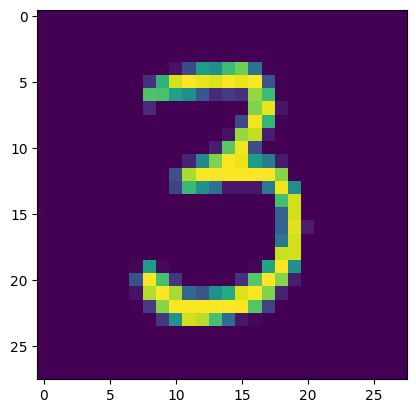

3


In [5]:
#displaying the image
plt.imshow(X_train[50]) # This function is used to display an image. The data passed to it should be an image-like array
plt.show() # This command is used to display the plot or image in an interactive window. It tells Matplotlib to actually render the image/plot that has been prepared with previous commands (in this case, with imshow()).

#printing the label
print(Y_train[50])

Image Labels

In [6]:
#use to print all the unique values in the Y_train and Y_test
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use the labels directly or use apply One Hot encoding
all the images can be directly used as they have common dimensions

NORMALIZING THE VALUES BETWEEN 0 TO 1
Gives better prediction

In [7]:
X_train = X_train / 255
X_test = X_test / 255

BUILDING THE NEURAL NETWORK

In [8]:
#setting the layers of the neural network


model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid') # 10 refers to 10 output classes #this is the output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


OPTIMIZER
What is an Optimizer?

An optimizer is an algorithm or method used to change the attributes of your neural network, such as weights and learning rate, to reduce the losses. Optimizers are responsible for updating the weights of your network based on the gradient of the loss function with respect to the weights.

Adam Optimizer:

Full Name: Adaptive Moment Estimation
Why Use Adam?
Adaptive Learning Rates: Adam adjusts the learning rate for each parameter dynamically, which often leads to faster convergence.
Momentum: It incorporates the concept of momentum by considering the past gradients to smooth out the updates.
Bias Correction: Adam includes mechanisms to correct the bias in the moment estimates, making it more robust in the initial stages of training.

LOSS FUNCTION
What is a Loss Function?

A loss function quantifies how well the model's predictions match the actual target values. During training, the model aims to minimize this loss, thereby improving its predictions.

Sparse Categorical Crossentropy:

Purpose: Used for multi-class classification problems where each example belongs to one of many classes.
When to Use: When your target labels are integers (e.g., 0, 1, 2, ..., 9) rather than one-hot encoded vectors.
Difference Between Categorical and Sparse Categorical Crossentropy:

Categorical Crossentropy:
Input Labels: One-hot encoded (e.g., [0, 0, 1, 0] for class 2)
Use Case: When labels are provided in a one-hot format.
Sparse Categorical Crossentropy:
Input Labels: Integers (e.g., 2 for class 2)
Use Case: When labels are provided as integers, which is often simpler and more efficient.

What are Metrics?

Metrics are used to monitor the performance of your model during training and evaluation. Unlike the loss function, which the model aims to minimize, metrics provide additional insights into how well the model is performing.

Accuracy Metric:

Definition: Accuracy measures the proportion of correct predictions made by the model out of all predictions.

Formula:

Accuracy = Number of Correct Predictions/Total Number of Predictions



Use Case: Primarily used for classification tasks where the goal is to predict discrete labels.

In [9]:
#compiling the neural network
model.compile(optimizer='adam', # used to find best parameters =>adam is one kind of optimizers like gradient descent
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
#training the model
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8492 - loss: 0.5275
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9554 - loss: 0.1480
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9676 - loss: 0.1066
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9737 - loss: 0.0836
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9787 - loss: 0.0675
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9827 - loss: 0.0558
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0467
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9871 - loss: 0.0402
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9889 - loss: 0.0355
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9904 - loss: 0.0295


ACCURACY ON TRAIN DATA = 99.04%

ACCURACY ON TEST DATA

In [12]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9649 - loss: 0.1393
0.9659000039100647


CHECKING TTHE INDIVIDUAL PREDICTIONS

In [13]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In Machine learning the predict method returns the class of the input but in neural netowrk it returns the probablity of each value

In [15]:
print(Y_pred[0])

[5.5507240e-05 1.4832900e-04 6.3406274e-02 9.6113902e-01 2.5718453e-08
 2.0377137e-04 3.0238208e-12 9.9997914e-01 4.4588004e-03 5.6646478e-01]


CONVERT THE PREDICTION PROBABLITES INTO  CLASS LABEL USNIG np.argmax
Tells the index which has maximum

In [16]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

CONFUSION MATRIX

In [17]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [18]:
print(conf_mat)

tf.Tensor(
[[ 933    0    2    2    3    0    6    1    8   25]
 [   0 1114    2    3    2    0    3    3    8    0]
 [   0    0  972   22    6    0    5    7   20    0]
 [   0    0    4  989    0    4    0    1    6    6]
 [   0    0    3    1  956    0    3    2    0   17]
 [   3    0    0   20    3  853    3    1    4    5]
 [   1    3    0    1    7    5  935    2    4    0]
 [   0    1    6    7    4    0    0  984    2   24]
 [   1    0    1   12    3    3    1    3  941    9]
 [   2    1    0    3   14    4    0    0    3  982]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

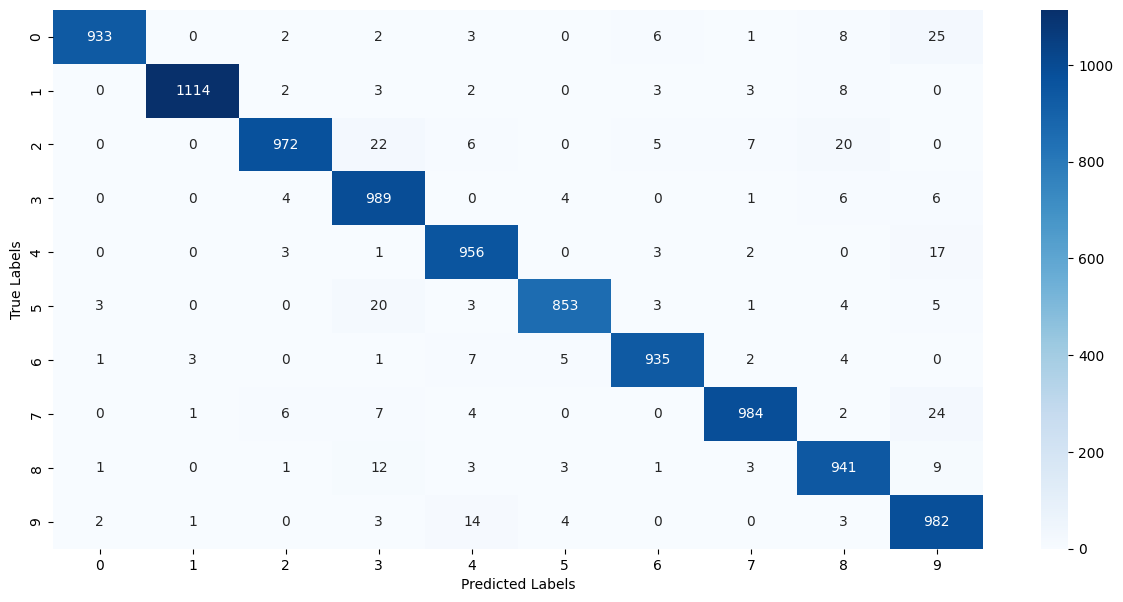

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

BUILD THE PREDICTIVE SYSTEM

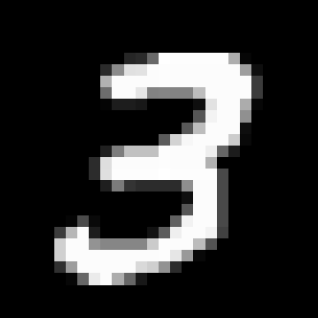

In [20]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)
type(input_image)
cv2_imshow(input_image)

In [21]:
input_image.shape


(318, 318, 3)

Even though it is a grayscale image it is read in RGB format. We need to convert to Grayscale format

In [22]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

(318, 318)

WE need to resize the image so that it has dimensions 28 * 28

In [24]:
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize.shape

(28, 28)

In [25]:
cv2_imshow(input_image_resize)

In [26]:
input_image_resize = input_image_resize/255

In [29]:
# I am going to predict for 1 image which has dimensions of 28 * 28
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1.2962980e-14 1.2490231e-05 1.8523833e-06 1.0000000e+00 1.4646764e-10
  6.0633747e-06 2.4842967e-20 3.2284888e-07 1.2278618e-02 9.9968189e-01]]


In [30]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


Predicitive System

Enter the Path of the image to be predicted: /content/MNIST_digit3.png


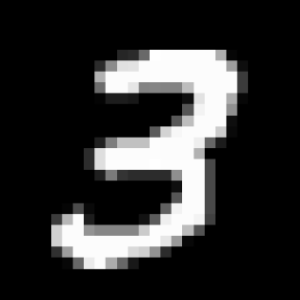

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The Handwritten Digitis :   3


In [48]:
input_image_path = input('Enter the Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(cv2.resize(input_image, (300, 300)))
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digitis :  ', input_pred_label)